In [96]:
#pip install pymannkendall

In [27]:
#pip install matplotlib-scalebar

In [97]:
#pip install folium

In [2]:
from scipy.stats import linregress
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import pandas as pd
import pymannkendall as mk
import folium
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib_scalebar.scalebar import ScaleBar

In [ ]:
#▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶MAN KENDALL TEST FOR GWS (WITH SOIL)◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀

In [128]:
# Load the groundwater storage data into a DataFrame
df = pd.read_csv('GWS.csv')

In [129]:

# To conduct a trend test on the time series data for each row, 
# we can use the Mann-Kendall test, which is specifically designed for detecting trends in time series data. 
# The Mann-Kendall test is a non-parametric test that does not assume any specific distribution for the data. 
# In Python, you can use the mk_test function from the pymannkendall package to perform the Mann-Kendall test.


#STEPS FOLLOWED
# Assume 'df' is your DataFrame with 6202 rows and 146 columns
# with the first two columns being 'lat' and 'lon', and the remaining columns
# containing monthly time series data from January 2003 to December 2014

def trend_test(row):
    lat, lon = row['lat'], row['lon']
    time_series = row.iloc[2:]
    
    # Perform the Mann-Kendall test on the time series
    result = mk.original_test(time_series)
    
    # Extract the p-value from the test result
    p_value = result.p
    return pd.Series([lat, lon, p_value])

# Apply the trend_test function on each row of the DataFrame
result_df = df.apply(trend_test, axis=1)

# Rename the columns of the result DataFrame
result_df.columns = ['lat', 'lon', 'p_value']

print(result_df)

         lat     lon       p_value
0     27.875  31.375  0.000000e+00
1     27.875  31.625  0.000000e+00
2     27.875  31.875  4.265754e-10
3     27.875  32.125  0.000000e+00
4     27.875  32.375  0.000000e+00
...      ...     ...           ...
6197  51.125  18.875  2.273004e-01
6198  51.125  19.125  9.833686e-02
6199  51.125  19.375  1.344786e-02
6200  51.125  19.625  2.434954e-03
6201  51.125  19.875  5.204020e-04

[6202 rows x 3 columns]


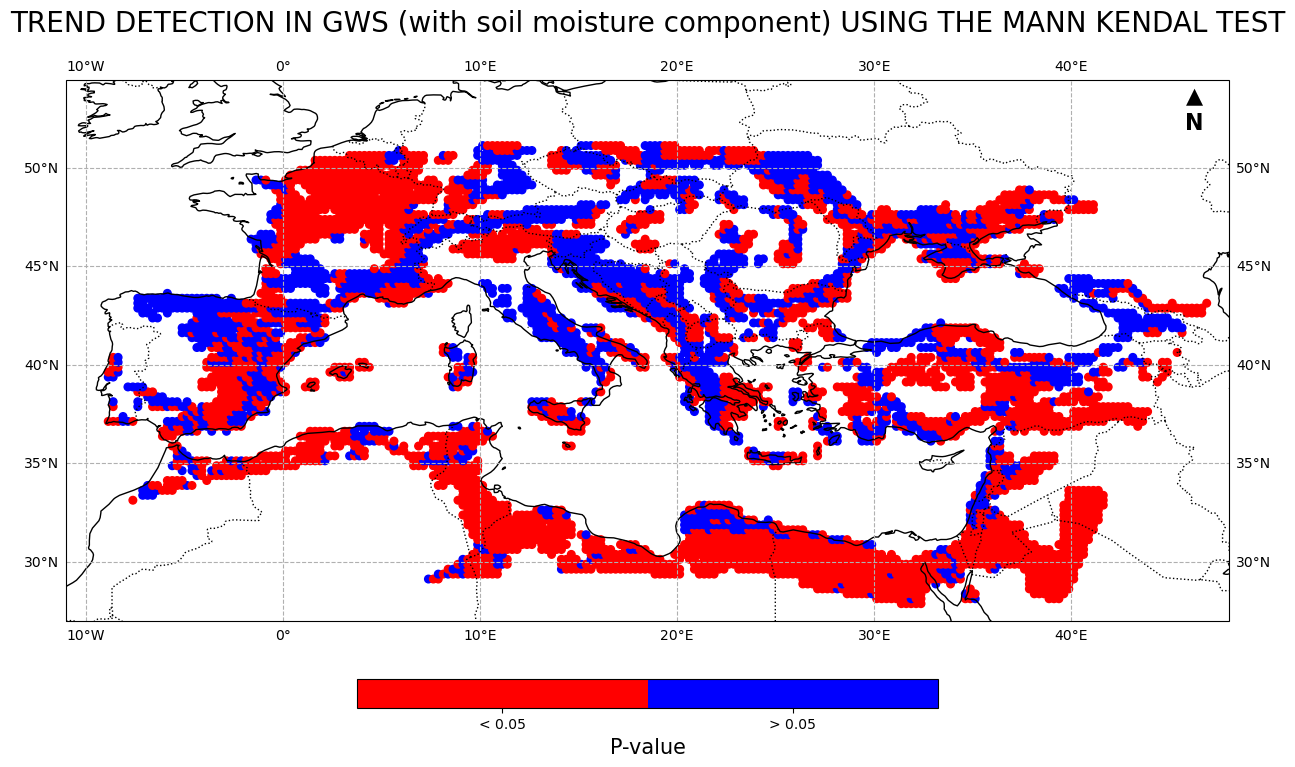

In [18]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['red', 'blue'])
norm = mcolors.BoundaryNorm([0, 0.05, 1], cmap.N)

# Determine the colors for each point based on the p_value column
colors = cmap(norm(result_df['p_value'].values))

# Plot the correlation coefficients as scatter points
sc = ax.scatter(result_df['lon'], result_df['lat'], c=result_df['p_value'],
                cmap=cmap, norm=norm, marker='o', s=30, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, ticks=[0.025, 0.525], pad=0.05)
cbar.set_label('P-value', fontsize=15)
cbar.ax.set_xticklabels(['< 0.05', '> 0.05'])

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# # Add scale bar
# scalebar = ScaleBar(1, location='lower left', units='m', length_fraction=0.2)
# ax.add_artist(scalebar)

# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('TREND DETECTION IN GWS (with soil moisture component) USING THE MANN KENDAL TEST',  fontsize=20, pad=20)
plt.show()

In [ ]:
#▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶MAN KENDALL TEST FOR GWS (NO SOIL)◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀

In [20]:
# Load the groundwater storage data into a DataFrame
df = pd.read_csv('GWS_no_soil.csv')

In [21]:

# To conduct a trend test on the time series data for each row, 
# we can use the Mann-Kendall test, which is specifically designed for detecting trends in time series data. 
# The Mann-Kendall test is a non-parametric test that does not assume any specific distribution for the data. 
# In Python, you can use the mk_test function from the pymannkendall package to perform the Mann-Kendall test.


#STEPS FOLLOWED
# Assume 'df' is your DataFrame with 6202 rows and 146 columns
# with the first two columns being 'lat' and 'lon', and the remaining columns
# containing monthly time series data from January 2003 to December 2014

def trend_test(row):
    lat, lon = row['lat'], row['lon']
    time_series = row.iloc[2:]
    
    # Perform the Mann-Kendall test on the time series
    result = mk.original_test(time_series)
    
    # Extract the p-value from the test result
    p_value = result.p
    return pd.Series([lat, lon, p_value])

# Apply the trend_test function on each row of the DataFrame
result_df = df.apply(trend_test, axis=1)

# Rename the columns of the result DataFrame
result_df.columns = ['lat', 'lon', 'p_value']

print(result_df)

         lat     lon   p_value
0     27.875  31.375  0.000000
1     27.875  31.625  0.000000
2     27.875  31.875  0.000000
3     27.875  32.125  0.000000
4     27.875  32.375  0.000000
...      ...     ...       ...
6197  51.125  18.875  0.003570
6198  51.125  19.125  0.003531
6199  51.125  19.375  0.003340
6200  51.125  19.625  0.002920
6201  51.125  19.875  0.003054

[6202 rows x 3 columns]


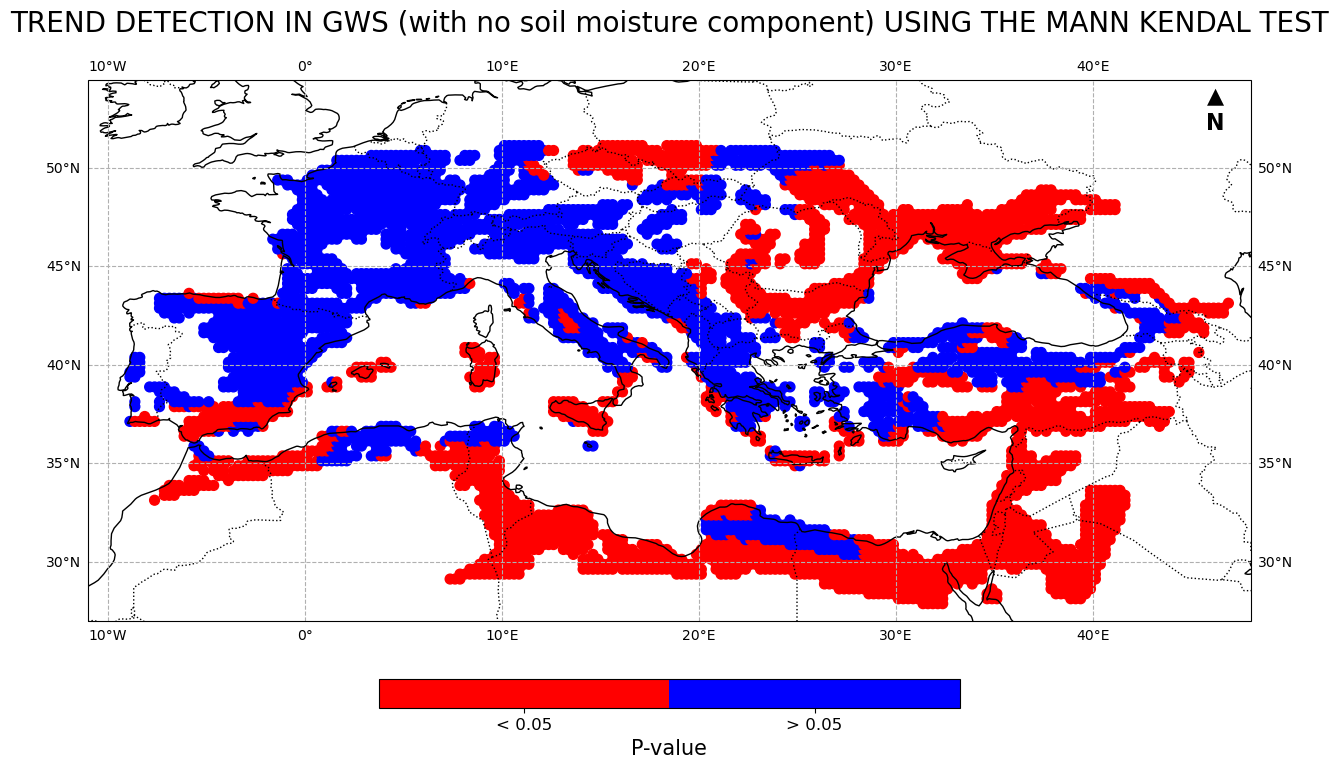

In [24]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['red', 'blue'])
norm = mcolors.BoundaryNorm([0, 0.05, 1], cmap.N)

# Determine the colors for each point based on the p_value column
colors = cmap(norm(result_df['p_value'].values))

# Plot the correlation coefficients as scatter points
sc = ax.scatter(result_df['lon'], result_df['lat'], c=result_df['p_value'],
                cmap=cmap, norm=norm, marker='o', s=50, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, ticks=[0.025, 0.525], pad=0.05)
cbar.set_label('P-value', fontsize=15)
cbar.ax.set_xticklabels(['< 0.05', '> 0.05'], fontsize =12)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# # Add scale bar
# scalebar = ScaleBar(1, location='lower left', units='m', length_fraction=0.2)
# ax.add_artist(scalebar)


# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('TREND DETECTION IN GWS (with no soil moisture component) USING THE MANN KENDAL TEST',  fontsize=20, pad=20)
plt.show()

In [ ]:
#▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶MAN KENDALL TEST FOR RECHARGE◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀

In [25]:
# Load the groundwater storage data into a DataFrame
df = pd.read_csv('recharge_with_coord.csv')

In [26]:

# To conduct a trend test on the time series data for each row, 
# we can use the Mann-Kendall test, which is specifically designed for detecting trends in time series data. 
# The Mann-Kendall test is a non-parametric test that does not assume any specific distribution for the data. 
# In Python, you can use the mk_test function from the pymannkendall package to perform the Mann-Kendall test.


#STEPS FOLLOWED
# Assume 'df' is your DataFrame with 6202 rows and 146 columns
# with the first two columns being 'lat' and 'lon', and the remaining columns
# containing monthly time series data from January 2003 to December 2014

def trend_test(row):
    lat, lon = row['lat'], row['lon']
    time_series = row.iloc[2:]
    
    # Perform the Mann-Kendall test on the time series
    result = mk.original_test(time_series)
    
    # Extract the p-value from the test result
    p_value = result.p
    return pd.Series([lat, lon, p_value])

# Apply the trend_test function on each row of the DataFrame
result_df = df.apply(trend_test, axis=1)

# Rename the columns of the result DataFrame
result_df.columns = ['lat', 'lon', 'p_value']

print(result_df)

         lat     lon   p_value
0     27.875  31.375  0.000006
1     27.875  31.625  0.000014
2     27.875  31.875  0.000270
3     27.875  32.125  0.001456
4     27.875  32.375  0.003531
...      ...     ...       ...
6197  51.125  18.875  0.014112
6198  51.125  19.125  0.025528
6199  51.125  19.375  0.030980
6200  51.125  19.625  0.044928
6201  51.125  19.875  0.044195

[6202 rows x 3 columns]


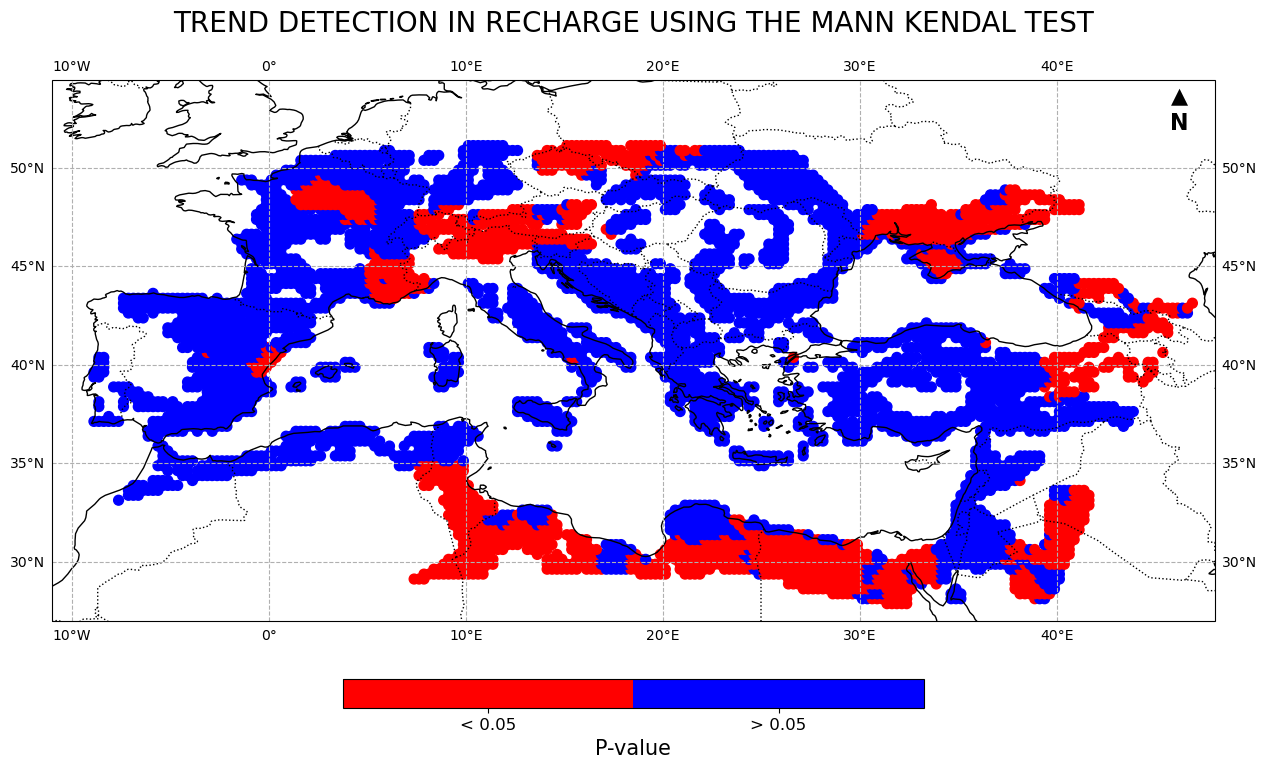

In [27]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['red', 'blue'])
norm = mcolors.BoundaryNorm([0, 0.05, 1], cmap.N)

# Determine the colors for each point based on the p_value column
colors = cmap(norm(result_df['p_value'].values))

# Plot the correlation coefficients as scatter points
sc = ax.scatter(result_df['lon'], result_df['lat'], c=result_df['p_value'],
                cmap=cmap, norm=norm, marker='o', s=50, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, ticks=[0.025, 0.525], pad=0.05)
cbar.set_label('P-value', fontsize=15)
cbar.ax.set_xticklabels(['< 0.05', '> 0.05'], fontsize =12)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# # Add scale bar
# scalebar = ScaleBar(1, location='lower left', units='m', length_fraction=0.2)
# ax.add_artist(scalebar)


# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('TREND DETECTION IN RECHARGE USING THE MANN KENDAL TEST',  fontsize=20, pad=20)
plt.show()

In [22]:
#====================================================SEASONAL MAN-KENDALL TEST===========================================

In [33]:
# The Seasonal Mann-Kendall (SMK) test is an extension of the Mann-Kendall test for detecting trends in hydrological time series data that exhibit seasonality. 
# The main idea behind the SMK test is to analyze each season separately and then combine the results to identify an overall trend.

# The Seasonal Mann-Kendall test is particularly useful when analyzing hydrological or environmental data, as these data often exhibit seasonal patterns. 
# For example, river discharge or groundwater storage levels might have distinct seasonal variations due to factors like precipitation, temperature, and evapotranspiration.

# The SMK test works by applying the standard Mann-Kendall test to each season separately. 
# Then, it combines the results using the "seasonal" Mann-Kendall test statistic, which is a weighted sum of the individual seasonal test statistics. 
# The null hypothesis for the SMK test is that there is no trend in the data, 
# while the alternative hypothesis is that there is a monotonic trend (either increasing or decreasing).

In [99]:
#▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶SEASONAL MAN-KENDALL-TEST FOR GWS (WITH SOIL)◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀

In [130]:
# Load the groundwater storage data into a DataFrame
df = pd.read_csv('GWS.csv')

In [131]:
#STEPS FOLLOWED
# Assume 'df' is your DataFrame with 6202 rows and 146 columns
# with the first two columns being 'lat' and 'lon', and the remaining columns
# containing monthly time series data from January 2003 to December 2014

def trend_test(row):
    lat, lon = row['lat'], row['lon']
    time_series = row.iloc[2:]
    
    # Perform the Seasonal Mann-Kendall test on the time series
    result = mk.seasonal_test(time_series, period=12)
    
    # Extract the p-value and Kendall's tau from the test result
    p_value = result.p
    tau = result.Tau
    return pd.Series([lat, lon, p_value, tau])

# Apply the trend_test function on each row of the DataFrame
result_df = df.apply(trend_test, axis=1)

# Rename the columns of the result DataFrame
result_df.columns = ['lat', 'lon', 'p_value', 'tau']

print(result_df)

         lat     lon       p_value       tau
0     27.875  31.375  0.000000e+00  0.699495
1     27.875  31.625  0.000000e+00 -0.676768
2     27.875  31.875  2.707465e-10 -0.404040
3     27.875  32.125  0.000000e+00  0.780303
4     27.875  32.375  0.000000e+00  0.782828
...      ...     ...           ...       ...
6197  51.125  18.875  4.884152e-01 -0.045455
6198  51.125  19.125  3.320643e-01 -0.063131
6199  51.125  19.375  2.800145e-02 -0.141414
6200  51.125  19.625  5.252571e-03 -0.179293
6201  51.125  19.875  3.397626e-04 -0.229798

[6202 rows x 4 columns]


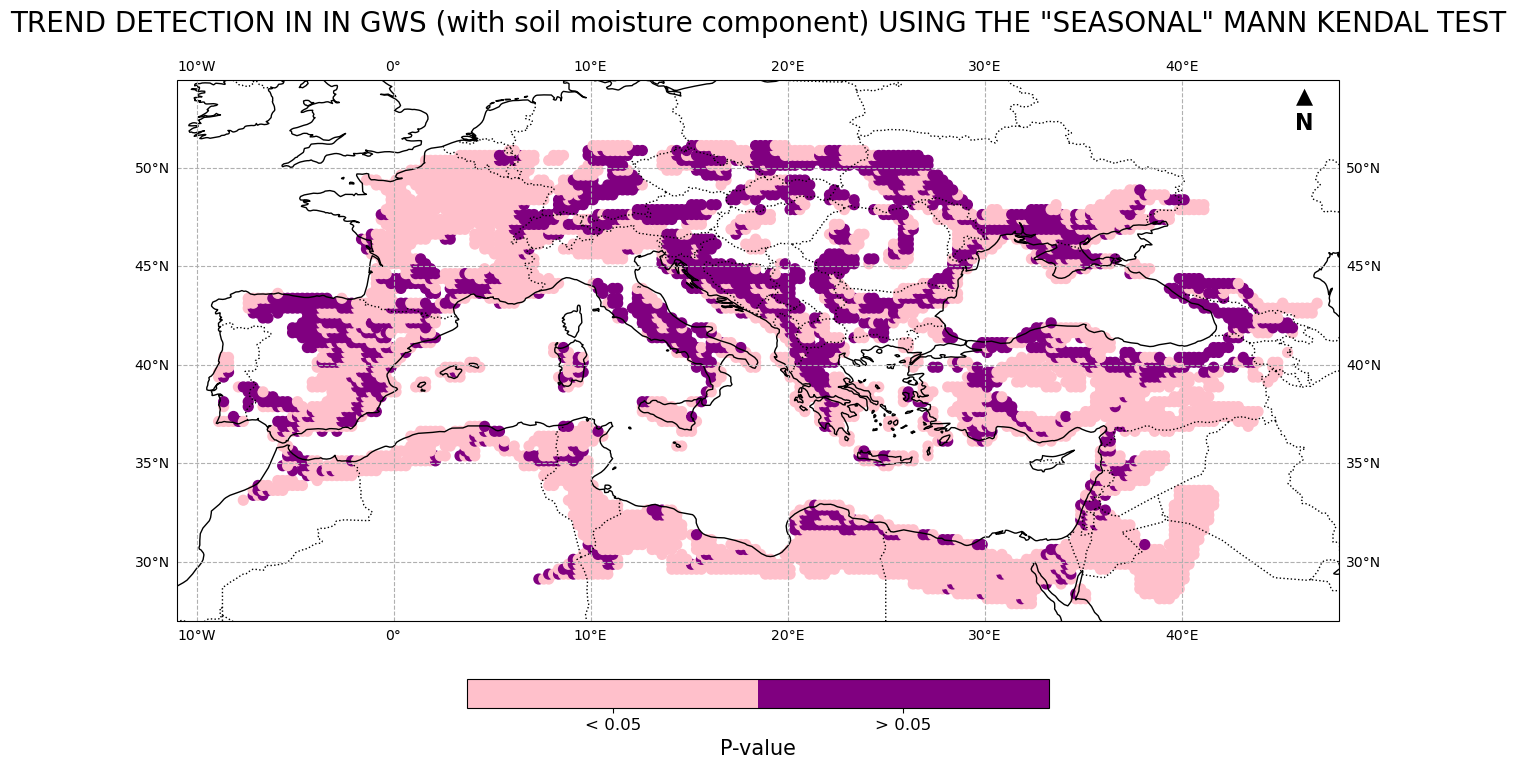

In [132]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['pink', 'purple'])
norm = mcolors.BoundaryNorm([0, 0.05, 1], cmap.N)

# Determine the colors for each point based on the p_value column
colors = cmap(norm(result_df['p_value'].values))

# Plot the correlation coefficients as scatter points
sc = ax.scatter(result_df['lon'], result_df['lat'], c=result_df['p_value'],
                cmap=cmap, norm=norm, marker='o', s=50, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, ticks=[0.025, 0.525], pad=0.05)
cbar.set_label('P-value', fontsize=15)
cbar.ax.set_xticklabels(['< 0.05', '> 0.05'], fontsize =12)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# # Add scale bar
# scalebar = ScaleBar(1, location='lower left', units='m', length_fraction=0.2)
# ax.add_artist(scalebar)


# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('TREND DETECTION IN IN GWS (with soil moisture component) USING THE "SEASONAL" MANN KENDAL TEST',  fontsize=20, pad=20)
plt.show()

In [103]:
result_df_subset =  result_df[result_df['p_value'] < 0.05]
result_df_subset

lat     lon       p_value       tau
0     27.875  31.375  0.000000e+00  0.699495
1     27.875  31.625  0.000000e+00 -0.676768
2     27.875  31.875  2.707465e-10 -0.404040
3     27.875  32.125  0.000000e+00  0.780303
4     27.875  32.375  0.000000e+00  0.782828
...      ...     ...           ...       ...
6193  51.125  16.875  6.157782e-04 -0.219697
6194  51.125  17.125  2.141594e-04 -0.237374
6199  51.125  19.375  2.800145e-02 -0.141414
6200  51.125  19.625  5.252571e-03 -0.179293
6201  51.125  19.875  3.397626e-04 -0.229798

[4238 rows x 4 columns]

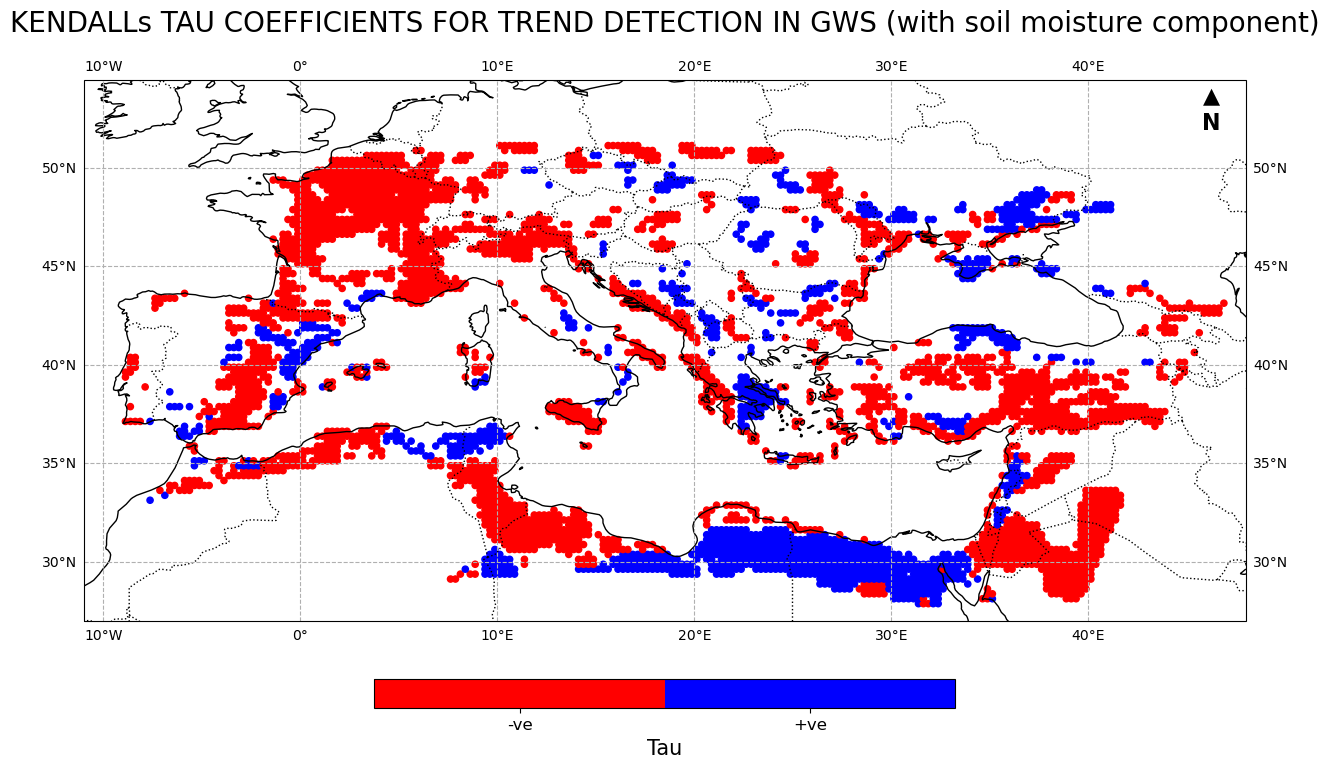

In [104]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['red', 'blue'])
norm = mcolors.BoundaryNorm([0, 0.5, 1], cmap.N)

# Normalize the tau values between 0 and 1
normalized_tau = (result_df_subset['tau'] + 1) / 2

# Determine the colors for each point based on the normalized tau values
colors = cmap(norm(normalized_tau.values))

# Plot the tau values as scatter points
sc = ax.scatter(result_df_subset['lon'], result_df_subset['lat'], c=normalized_tau,
                cmap=cmap, norm=norm, marker='o', s=20, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, ticks=[0.25, 0.75], pad=0.05)
cbar.set_label('Tau', fontsize=15)
cbar.ax.set_xticklabels(['-ve', '+ve'], fontsize=12)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('KENDALLs TAU COEFFICIENTS FOR TREND DETECTION IN GWS (with soil moisture component)',  fontsize=20, pad=20)
plt.show()

In [48]:
#▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶MAN KENDALL TEST FOR GWS (WITH SOIL) P_value = thresholds◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀

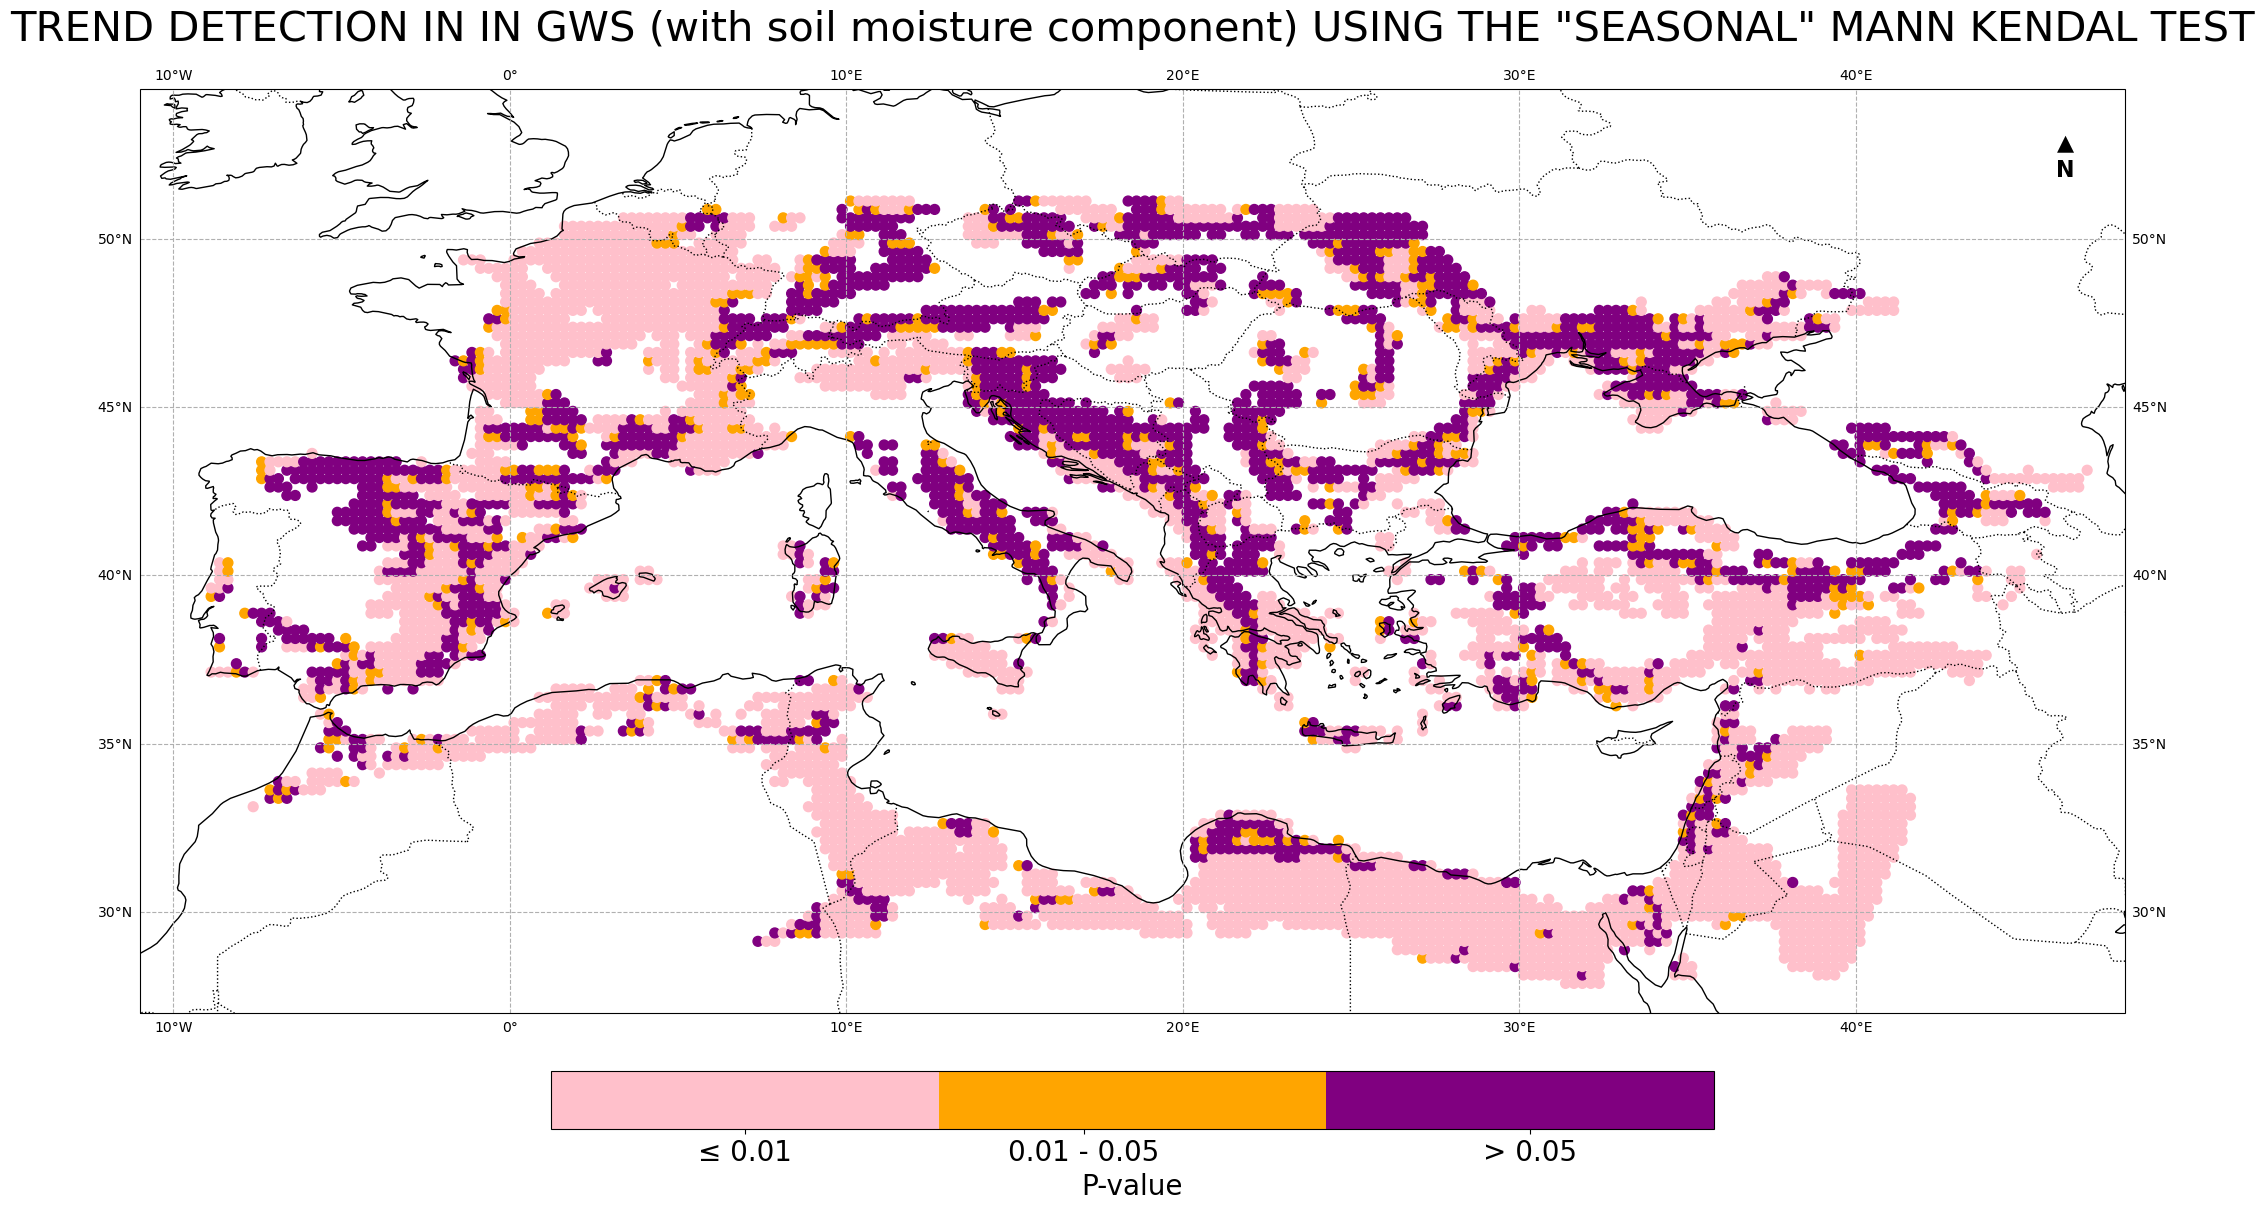

In [57]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['pink', 'orange', 'purple'])
norm = mcolors.BoundaryNorm([0, 0.01, 0.05, 1], cmap.N)

# Determine the colors for each point based on the p_value column
colors = cmap(norm(result_df['p_value'].values))

# Plot the correlation coefficients as scatter points
sc = ax.scatter(result_df['lon'], result_df['lat'], c=result_df['p_value'],
                cmap=cmap, norm=norm, marker='o', s=50, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, pad=0.05, ticks=[0.005, 0.025, 0.55])
cbar.set_label('P-value', fontsize=20)
cbar.ax.set_xticklabels(['≤ 0.01', '0.01 - 0.05', '> 0.05'], fontsize=20)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# # Add scale bar
# scalebar = ScaleBar(1, location='lower left', units='m', length_fraction=0.2)
# ax.add_artist(scalebar)

# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('TREND DETECTION IN IN GWS (with soil moisture component) USING THE "SEASONAL" MANN KENDAL TEST', fontsize=30, pad=20)
plt.show()

In [108]:
#▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶SEASONAL MAN-KENDALL-TEST FOR GWS (WITH NO SOIL)◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀

In [109]:
# Load the groundwater storage data into a DataFrame
df = pd.read_csv('GWS_no_soil.csv')

In [110]:
#STEPS FOLLOWED
# Assume 'df' is your DataFrame with 6202 rows and 146 columns
# with the first two columns being 'lat' and 'lon', and the remaining columns
# containing monthly time series data from January 2003 to December 2014

def trend_test(row):
    lat, lon = row['lat'], row['lon']
    time_series = row.iloc[2:]
    
    # Perform the Seasonal Mann-Kendall test on the time series
    result = mk.seasonal_test(time_series, period=12)
    
    # Extract the p-value and Kendall's tau from the test result
    p_value = result.p
    tau = result.Tau
    return pd.Series([lat, lon, p_value, tau])

# Apply the trend_test function on each row of the DataFrame
result_df = df.apply(trend_test, axis=1)

# Rename the columns of the result DataFrame
result_df.columns = ['lat', 'lon', 'p_value', 'tau']

print(result_df)

         lat     lon   p_value       tau
0     27.875  31.375  0.000000 -0.696970
1     27.875  31.625  0.000000 -0.724747
2     27.875  31.875  0.000000 -0.724747
3     27.875  32.125  0.000000 -0.724747
4     27.875  32.375  0.000000 -0.724747
...      ...     ...       ...       ...
6197  51.125  18.875  0.000007  0.287879
6198  51.125  19.125  0.000007  0.287879
6199  51.125  19.375  0.000008  0.285354
6200  51.125  19.625  0.000008  0.285354
6201  51.125  19.875  0.000008  0.285354

[6202 rows x 4 columns]


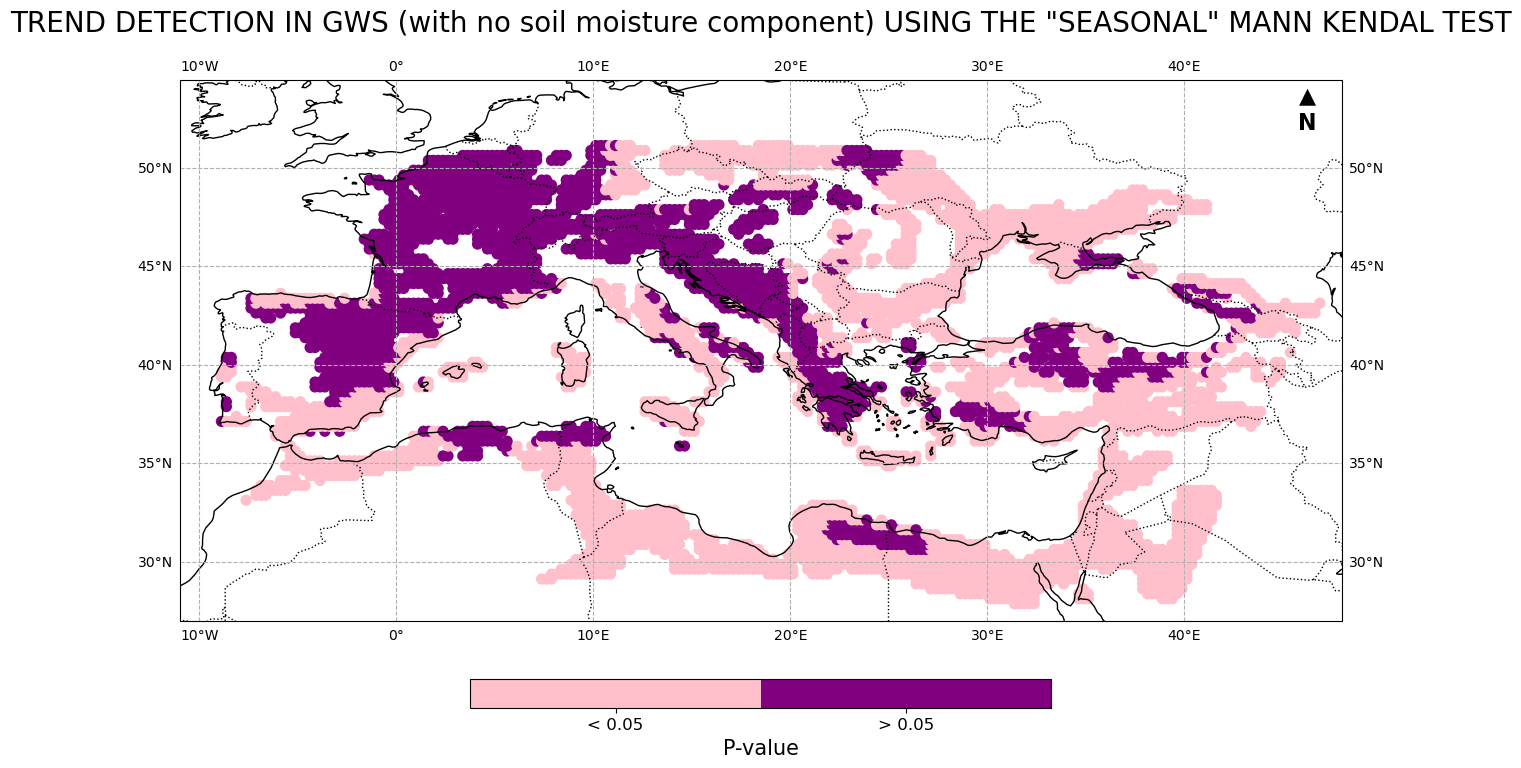

In [111]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['pink', 'purple'])
norm = mcolors.BoundaryNorm([0, 0.05, 1], cmap.N)

# Determine the colors for each point based on the p_value column
colors = cmap(norm(result_df['p_value'].values))

# Plot the correlation coefficients as scatter points
sc = ax.scatter(result_df['lon'], result_df['lat'], c=result_df['p_value'],
                cmap=cmap, norm=norm, marker='o', s=50, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, ticks=[0.025, 0.525], pad=0.05)
cbar.set_label('P-value', fontsize=15)
cbar.ax.set_xticklabels(['< 0.05', '> 0.05'], fontsize =12)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# # Add scale bar
# scalebar = ScaleBar(1, location='lower left', units='m', length_fraction=0.2)
# ax.add_artist(scalebar)


# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('TREND DETECTION IN GWS (with no soil moisture component) USING THE "SEASONAL" MANN KENDAL TEST',  fontsize=20, pad=20)
plt.show()

In [112]:
result_df_subset =  result_df[result_df['p_value'] < 0.05]
result_df_subset

lat     lon   p_value       tau
0     27.875  31.375  0.000000 -0.696970
1     27.875  31.625  0.000000 -0.724747
2     27.875  31.875  0.000000 -0.724747
3     27.875  32.125  0.000000 -0.724747
4     27.875  32.375  0.000000 -0.724747
...      ...     ...       ...       ...
6197  51.125  18.875  0.000007  0.287879
6198  51.125  19.125  0.000007  0.287879
6199  51.125  19.375  0.000008  0.285354
6200  51.125  19.625  0.000008  0.285354
6201  51.125  19.875  0.000008  0.285354

[3791 rows x 4 columns]

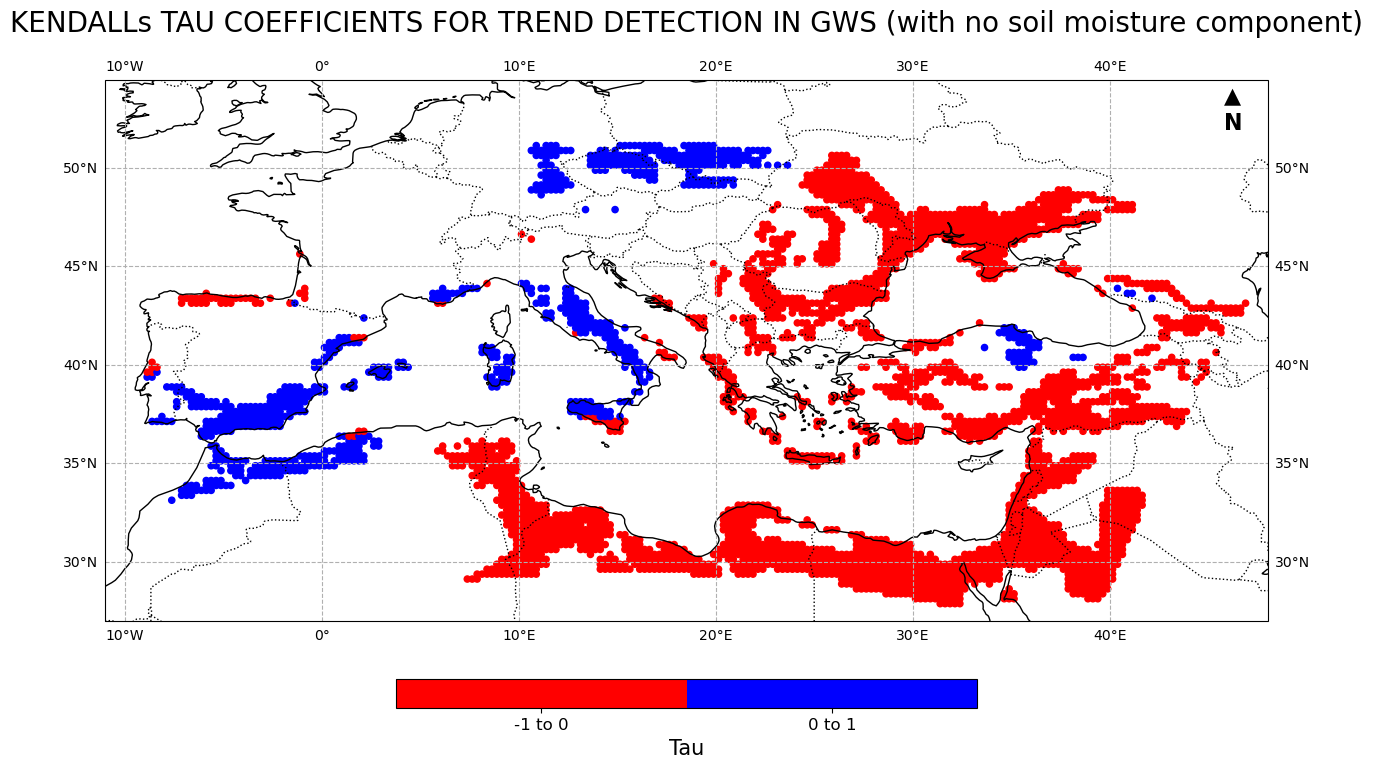

In [116]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['red', 'blue'])
norm = mcolors.BoundaryNorm([0, 0.5, 1], cmap.N)

# Normalize the tau values between 0 and 1
normalized_tau = (result_df_subset['tau'] + 1) / 2

# Determine the colors for each point based on the normalized tau values
colors = cmap(norm(normalized_tau.values))

# Plot the tau values as scatter points
sc = ax.scatter(result_df_subset['lon'], result_df_subset['lat'], c=normalized_tau,
                cmap=cmap, norm=norm, marker='o', s=20, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, ticks=[0.25, 0.75], pad=0.05)
cbar.set_label('Tau', fontsize=15)
cbar.ax.set_xticklabels(['-1 to 0', '0 to 1'], fontsize=12)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('KENDALLs TAU COEFFICIENTS FOR TREND DETECTION IN GWS (with no soil moisture component)',  fontsize=20, pad=20)
plt.show()

In [114]:
#▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶Seasonal MAN KENDALL TEST FOR GWS (NO SOIL) P_value = thresholded◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀

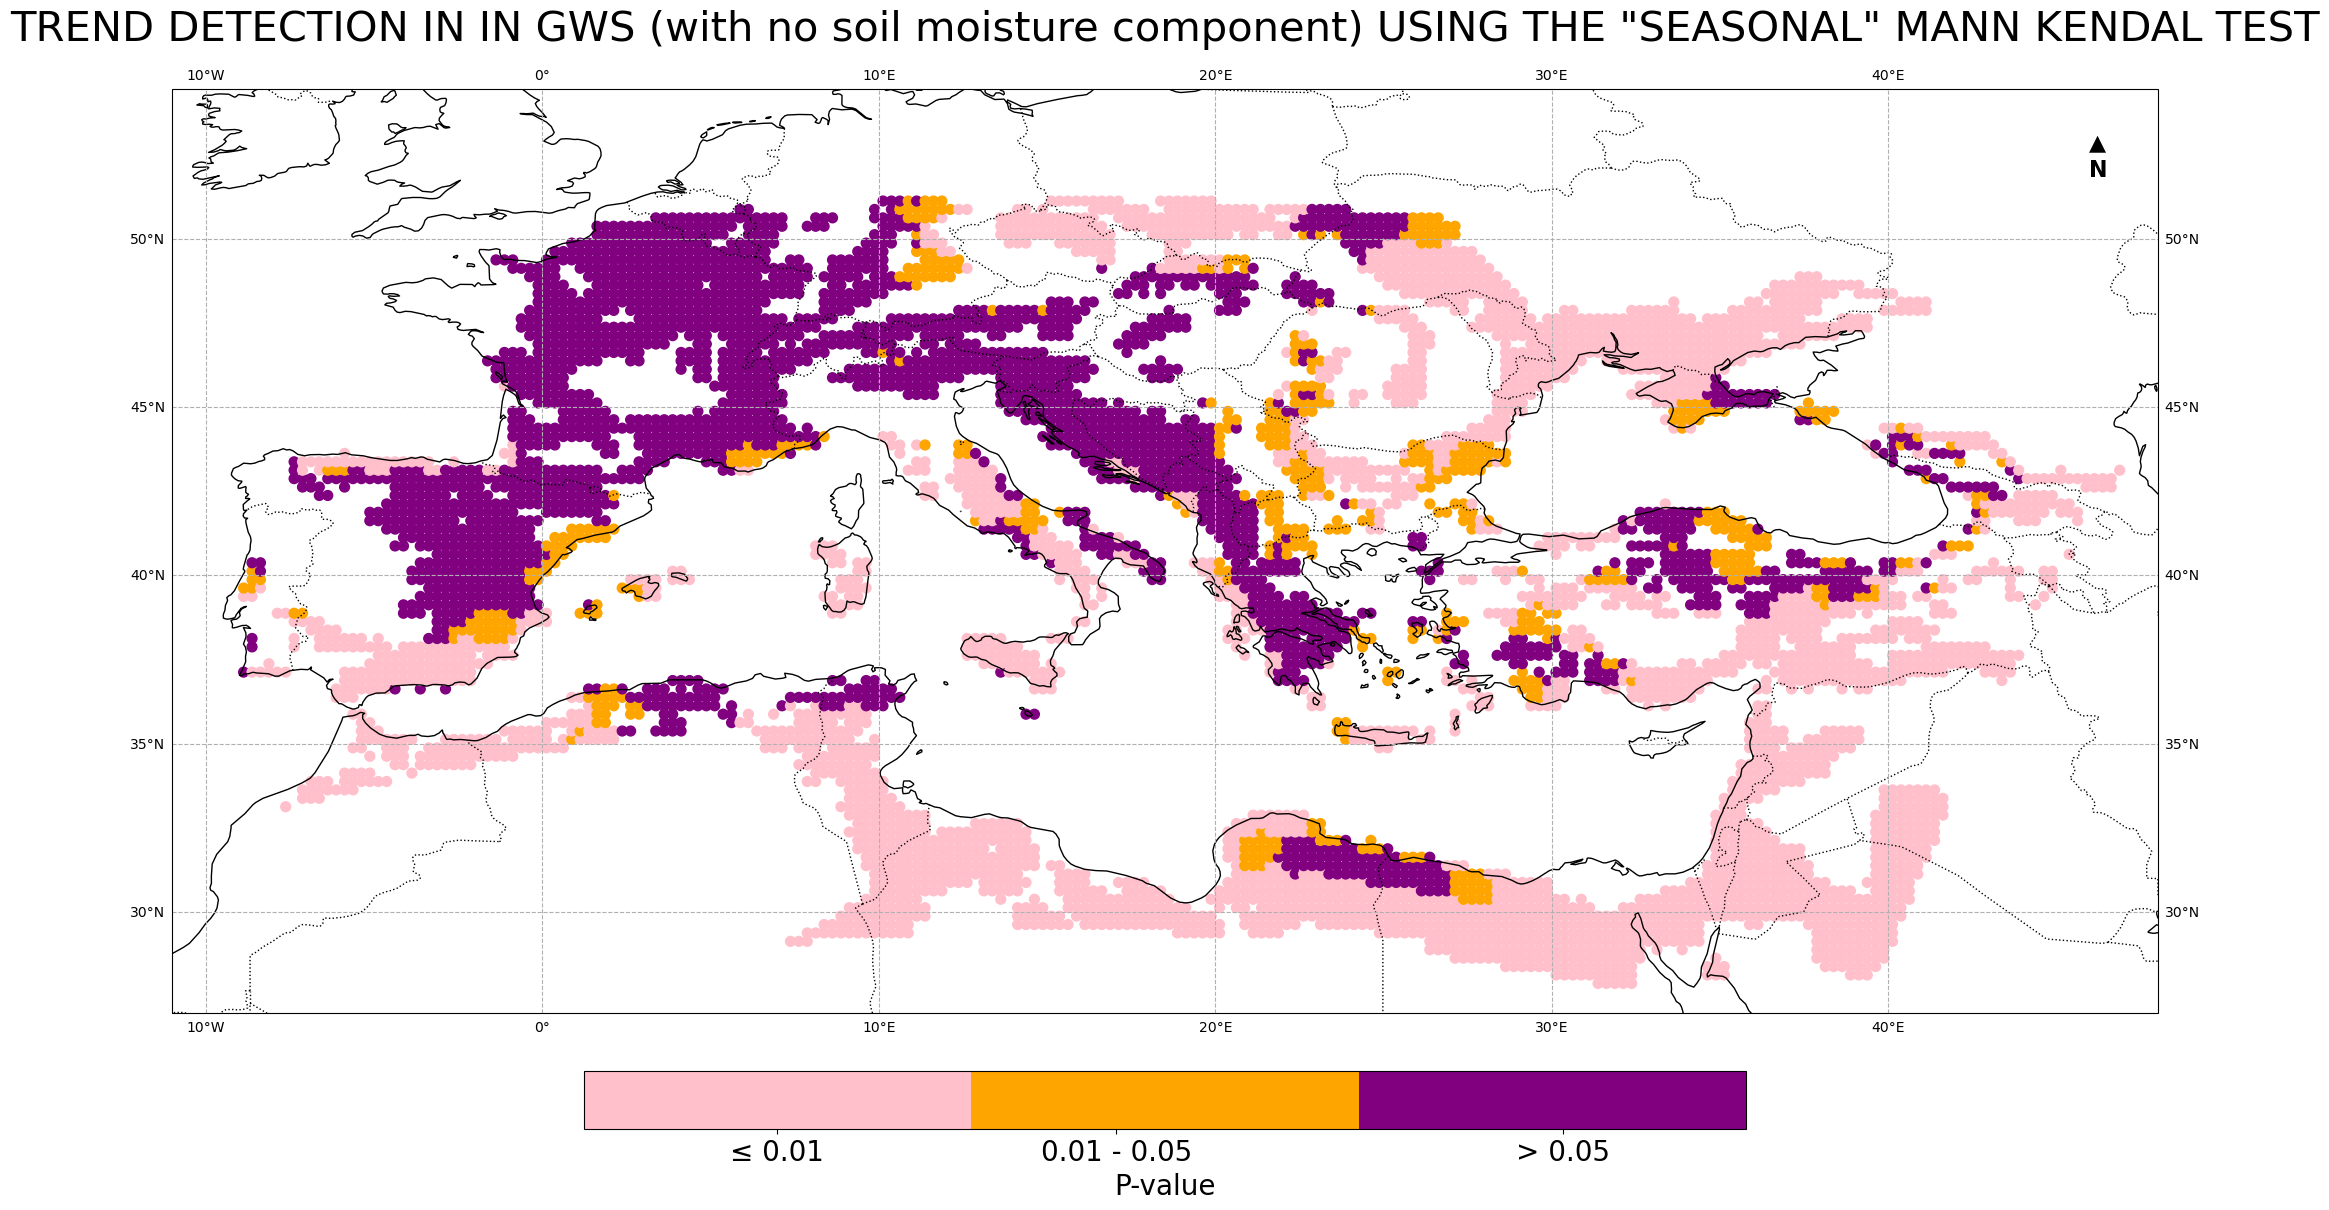

In [115]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['pink', 'orange', 'purple'])
norm = mcolors.BoundaryNorm([0, 0.01, 0.05, 1], cmap.N)

# Determine the colors for each point based on the p_value column
colors = cmap(norm(result_df['p_value'].values))

# Plot the correlation coefficients as scatter points
sc = ax.scatter(result_df['lon'], result_df['lat'], c=result_df['p_value'],
                cmap=cmap, norm=norm, marker='o', s=50, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, pad=0.05, ticks=[0.005, 0.025, 0.55])
cbar.set_label('P-value', fontsize=20)
cbar.ax.set_xticklabels(['≤ 0.01', '0.01 - 0.05', '> 0.05'], fontsize=20)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# # Add scale bar
# scalebar = ScaleBar(1, location='lower left', units='m', length_fraction=0.2)
# ax.add_artist(scalebar)

# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('TREND DETECTION IN IN GWS (with no soil moisture component) USING THE "SEASONAL" MANN KENDAL TEST', fontsize=30, pad=20)
plt.show()

In [117]:
#▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶SEASONAL MAN-KENDALL-TEST FOR RECHARGE◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀

In [118]:
# Load the groundwater storage data into a DataFrame
df = pd.read_csv('recharge_with_coord.csv')

In [119]:
#STEPS FOLLOWED
# Assume 'df' is your DataFrame with 6202 rows and 146 columns
# with the first two columns being 'lat' and 'lon', and the remaining columns
# containing monthly time series data from January 2003 to December 2014

def trend_test(row):
    lat, lon = row['lat'], row['lon']
    time_series = row.iloc[2:]
    
    # Perform the Seasonal Mann-Kendall test on the time series
    result = mk.seasonal_test(time_series, period=12)
    
    # Extract the p-value and Kendall's tau from the test result
    p_value = result.p
    tau = result.Tau
    return pd.Series([lat, lon, p_value, tau])

# Apply the trend_test function on each row of the DataFrame
result_df = df.apply(trend_test, axis=1)

# Rename the columns of the result DataFrame
result_df.columns = ['lat', 'lon', 'p_value', 'tau']

print(result_df)

         lat     lon   p_value       tau
0     27.875  31.375  0.000025 -0.270202
1     27.875  31.625  0.000250 -0.234848
2     27.875  31.875  0.002798 -0.191919
3     27.875  32.125  0.008469 -0.169192
4     27.875  32.375  0.014900 -0.156566
...      ...     ...       ...       ...
6197  51.125  18.875  0.060034  0.121212
6198  51.125  19.125  0.100383  0.106061
6199  51.125  19.375  0.117860  0.101010
6200  51.125  19.625  0.227237  0.078283
6201  51.125  19.875  0.148444  0.093434

[6202 rows x 4 columns]


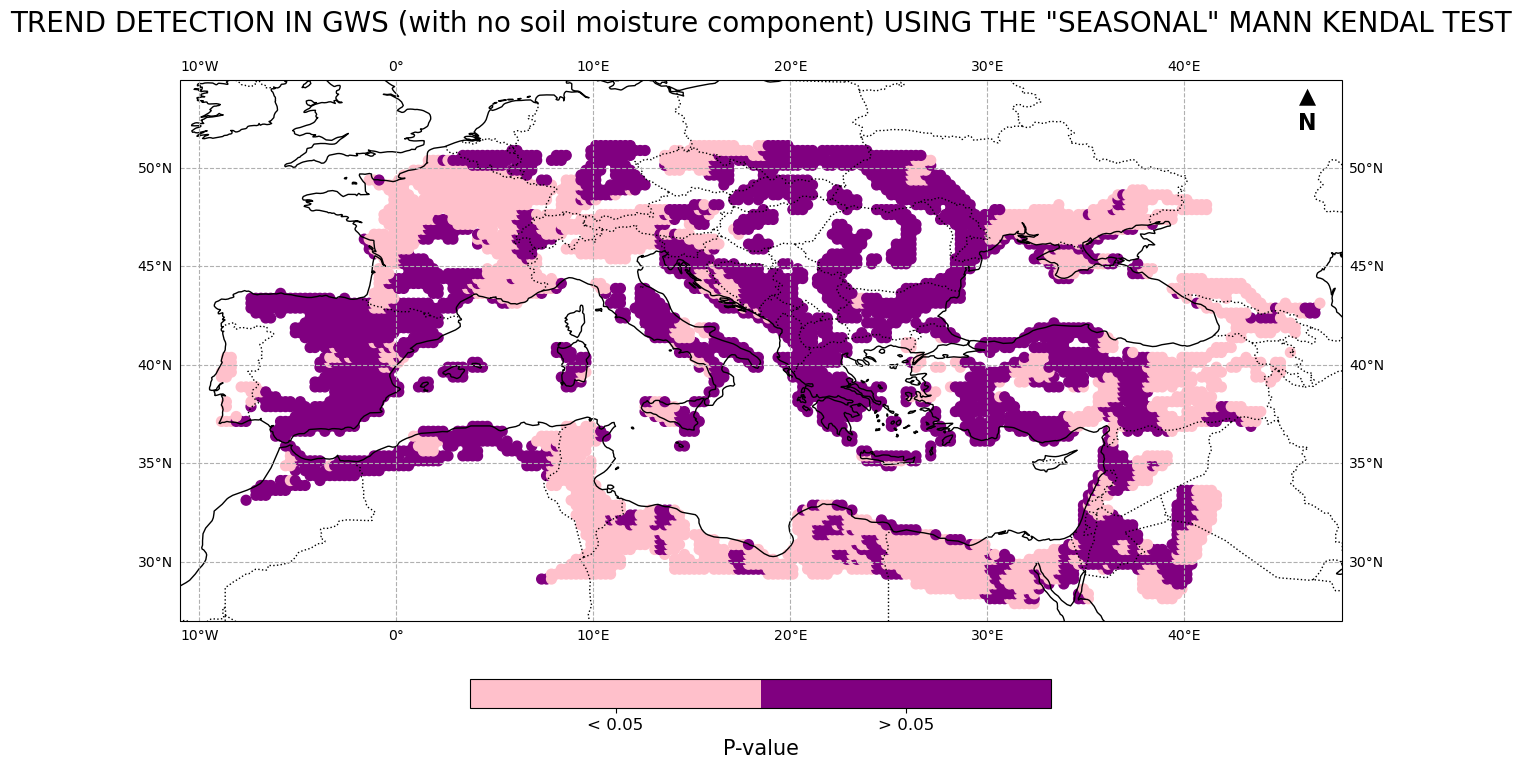

In [120]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['pink', 'purple'])
norm = mcolors.BoundaryNorm([0, 0.05, 1], cmap.N)

# Determine the colors for each point based on the p_value column
colors = cmap(norm(result_df['p_value'].values))

# Plot the correlation coefficients as scatter points
sc = ax.scatter(result_df['lon'], result_df['lat'], c=result_df['p_value'],
                cmap=cmap, norm=norm, marker='o', s=50, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, ticks=[0.025, 0.525], pad=0.05)
cbar.set_label('P-value', fontsize=15)
cbar.ax.set_xticklabels(['< 0.05', '> 0.05'], fontsize =12)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# # Add scale bar
# scalebar = ScaleBar(1, location='lower left', units='m', length_fraction=0.2)
# ax.add_artist(scalebar)


# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('TREND DETECTION IN GWS (with no soil moisture component) USING THE "SEASONAL" MANN KENDAL TEST',  fontsize=20, pad=20)
plt.show()

In [121]:
result_df_subset =  result_df[result_df['p_value'] < 0.05]
result_df_subset

lat     lon   p_value       tau
0     27.875  31.375  0.000025 -0.270202
1     27.875  31.625  0.000250 -0.234848
2     27.875  31.875  0.002798 -0.191919
3     27.875  32.125  0.008469 -0.169192
4     27.875  32.375  0.014900 -0.156566
...      ...     ...       ...       ...
6192  51.125  16.625  0.004101  0.184343
6193  51.125  16.875  0.004101  0.184343
6194  51.125  17.125  0.003183  0.189394
6195  51.125  18.375  0.011937  0.161616
6196  51.125  18.625  0.022819  0.146465

[2744 rows x 4 columns]

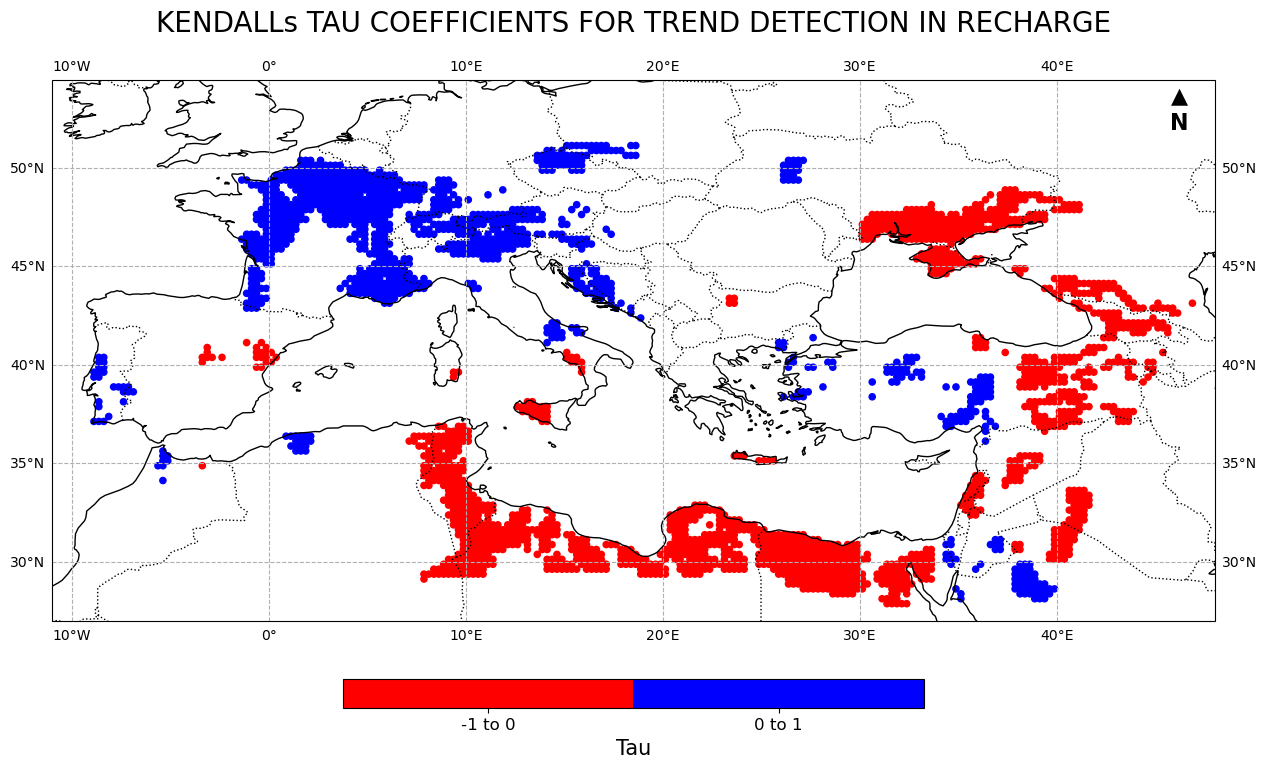

In [127]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['red', 'blue'])
norm = mcolors.BoundaryNorm([0, 0.5, 1], cmap.N)

# Normalize the tau values between 0 and 1
normalized_tau = (result_df_subset['tau'] + 1) / 2

# Determine the colors for each point based on the normalized tau values
colors = cmap(norm(normalized_tau.values))

# Plot the tau values as scatter points
sc = ax.scatter(result_df_subset['lon'], result_df_subset['lat'], c=normalized_tau,
                cmap=cmap, norm=norm, marker='o', s=20, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, ticks=[0.25, 0.75], pad=0.05)
cbar.set_label('Tau', fontsize=15)
cbar.ax.set_xticklabels(['-1 to 0', '0 to 1'], fontsize=12)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('KENDALLs TAU COEFFICIENTS FOR TREND DETECTION IN RECHARGE',  fontsize=20, pad=20)
plt.show()

In [123]:
#▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶▶Seasonal MAN KENDALL TEST FOR GWS (NO SOIL) P_value = thresholded◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀

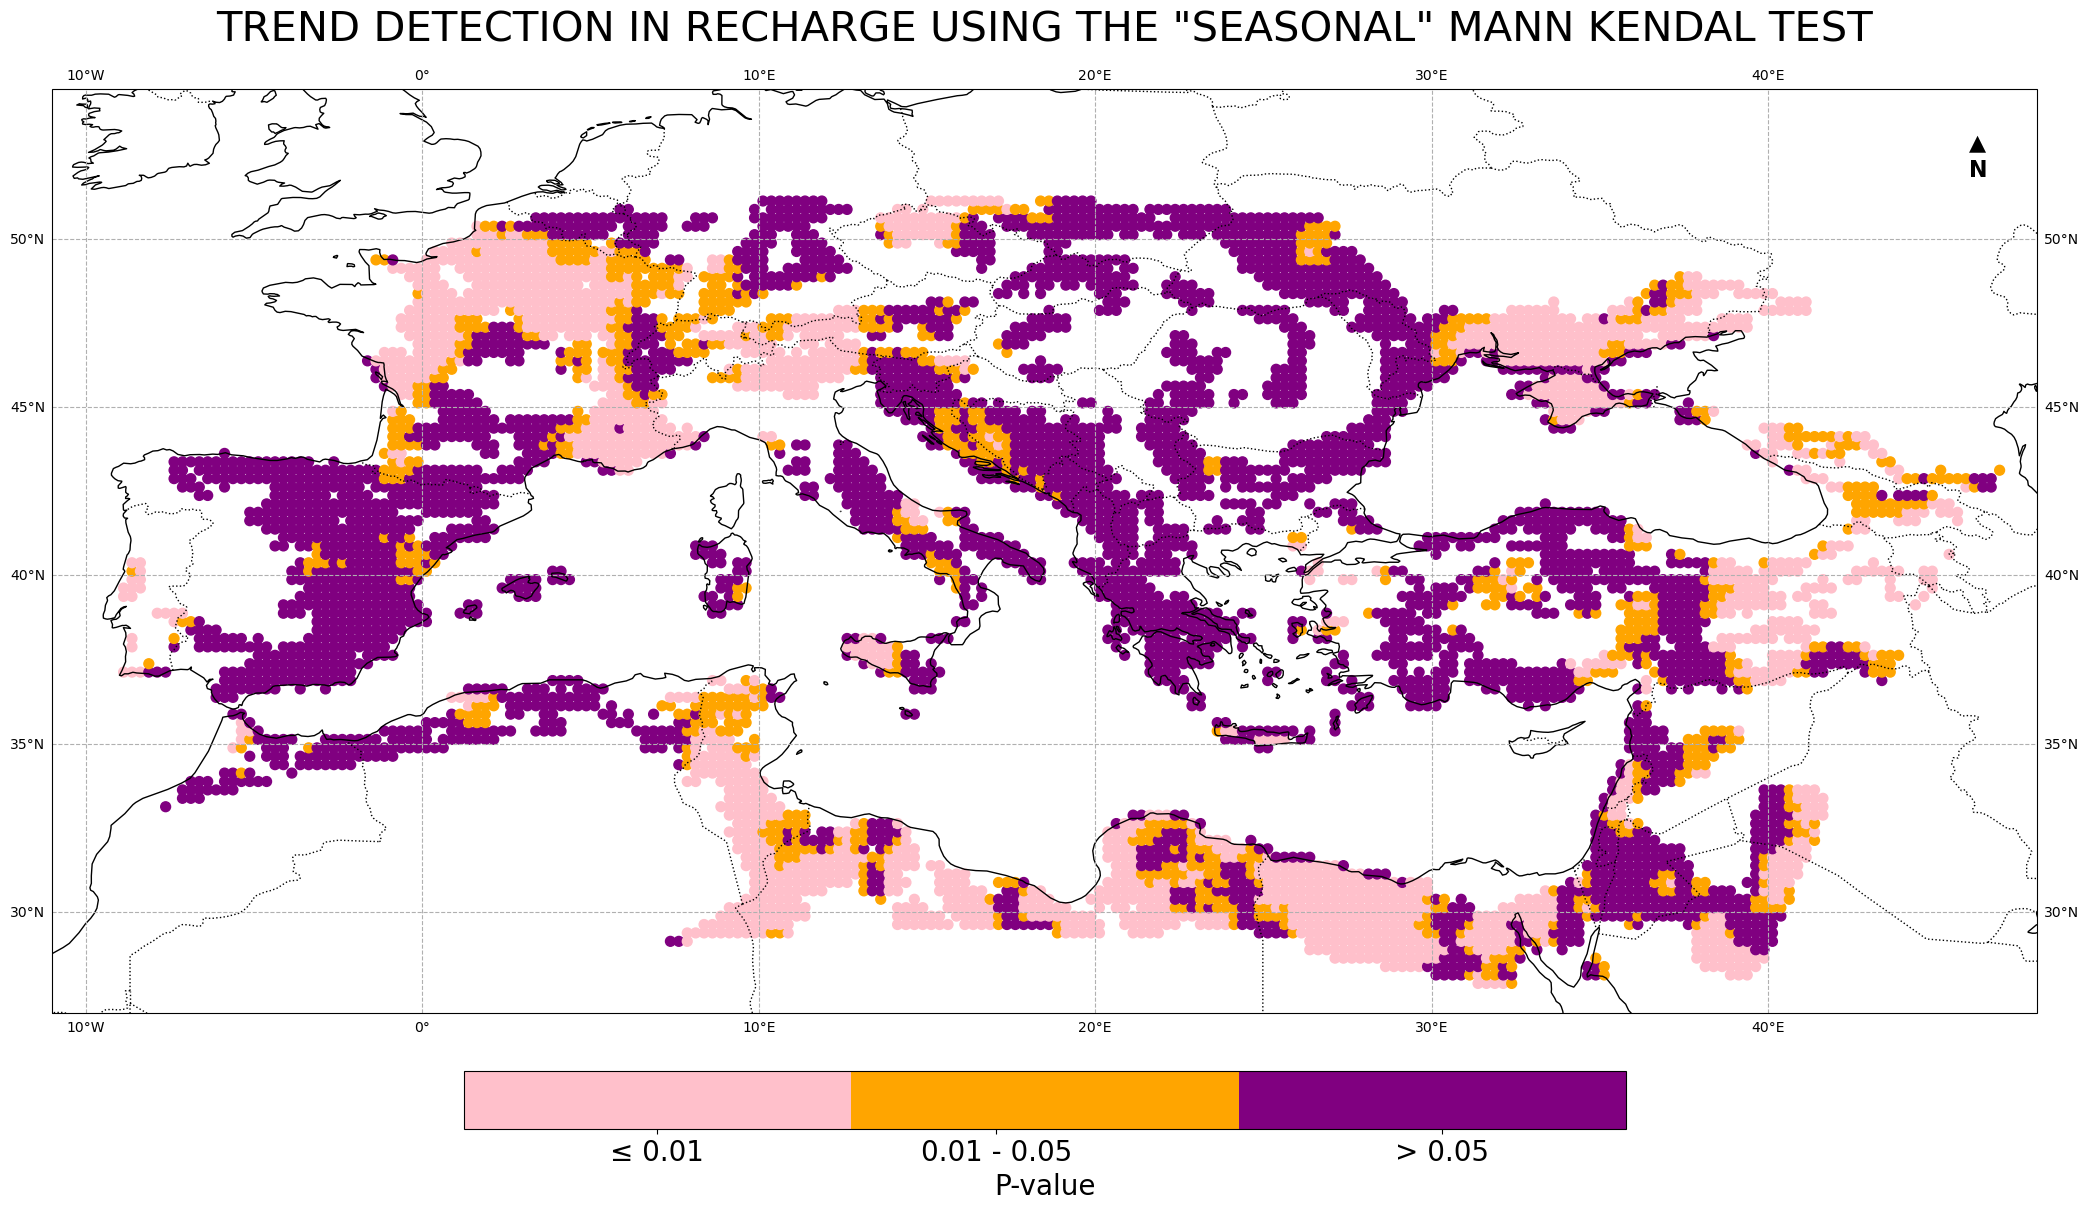

In [126]:
# Plot the correlation coefficients on a map
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Define custom colormap and normalization function
cmap = mcolors.ListedColormap(['pink', 'orange', 'purple'])
norm = mcolors.BoundaryNorm([0, 0.01, 0.05, 1], cmap.N)

# Determine the colors for each point based on the p_value column
colors = cmap(norm(result_df['p_value'].values))

# Plot the correlation coefficients as scatter points
sc = ax.scatter(result_df['lon'], result_df['lat'], c=result_df['p_value'],
                cmap=cmap, norm=norm, marker='o', s=50, edgecolor=colors, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, orientation='horizontal', shrink=0.5, pad=0.05, ticks=[0.005, 0.025, 0.55])
cbar.set_label('P-value', fontsize=20)
cbar.ax.set_xticklabels(['≤ 0.01', '0.01 - 0.05', '> 0.05'], fontsize=20)

# Add north arrow
arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=16, fontweight='bold')

# # Add scale bar
# scalebar = ScaleBar(1, location='lower left', units='m', length_fraction=0.2)
# ax.add_artist(scalebar)

# Set map extent (optional)
ax.set_extent([-11, 48, 27, 51])

plt.title('TREND DETECTION IN RECHARGE USING THE "SEASONAL" MANN KENDAL TEST', fontsize=30, pad=20)
plt.show()